In [11]:
################################################################################
# Author 1:      Bernhard Lugger
# MatNr 1:       01114792
# Author 2:      Paula Nauta
# MatNr 2:       11938311
# File:          assignment2.ipynb
# Description:   several different plots of OECD data
# Comments:      - filepaths of lineplot3, barplot2, barplot3 edited
#                - schema of code design added
#                -
################################################################################

In [12]:
# ========== imports ============
import pandas as pd
import pycountry as pc
import pycountry_convert as pcc
import plotly.express as px
from IPython import display

### Code Design

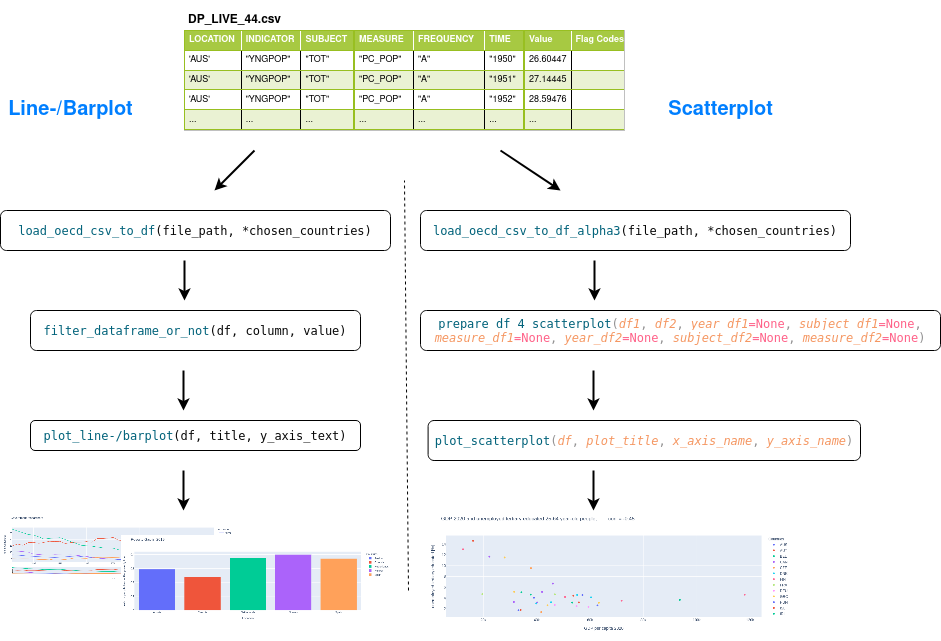

In [13]:
display.Image("./code_design_schema.png")

### Functions

In [14]:
def countries_fullname(country):
    """receives alpha_3 from a country (e.g. 'AUS') and returns the
    full name of the country (e.g. 'Australia')"""
    country_full = pc.countries.get(alpha_3=country)
    country_name = country_full.name
    return country_name


    # '*' means that you can pass as many parameters (in this case 'countries' as you wish)
def load_oecd_csv_to_df(file_path, *chosen_countries):
    """loads one csv from the given path and returns the relevant columns of arbitrary chosen
    country-alpha3 names to a dataframe. With LOCATION of countries in fullname. """
    oecd_data = pd.read_csv(file_path, header=0, usecols=['LOCATION','SUBJECT', 'MEASURE', 'TIME', 'Value'],
                            delimiter=",")     # ('header=0' --> column names)

    if not chosen_countries:    # DEFAULT if no countries chosen, all rows/entries get returned
        return oecd_data

    else:
        final_filtered_df = pd.DataFrame()
        country_alpha3_names = []
        for country in chosen_countries:
            country_alpha3_names.append(country)

        for country in country_alpha3_names:
            df_mask=oecd_data['LOCATION']==country            # known from assignment1
            filtered_df = oecd_data[df_mask]
            final_filtered_df = final_filtered_df.append(filtered_df)

        for country in chosen_countries:        # replace alpha3 names with full names of countries
            full_name = countries_fullname(country)
            final_filtered_df = final_filtered_df.replace([country], full_name)

        return final_filtered_df


def load_oecd_csv_to_df_alpha3(file_path, *chosen_countries):
    """loads one csv from the given path and returns the relevant columns of arbitrary
    chosen country-alpha3 codes to a dataframe. With LOCATION of countries in alpha3 name."""
    oecd_data = pd.read_csv(file_path, header=0, usecols=['LOCATION','SUBJECT', 'MEASURE', 'TIME', 'Value'],
                            delimiter=",")

    if not chosen_countries:    # DEFAULT if no countries chosen, all rows/entries get returned
        return oecd_data
    else:
        final_filtered_df = pd.DataFrame()
        country_alpha3_names = []
        for country in chosen_countries:
            country_alpha3_names.append(country)

        for country in country_alpha3_names:
            df_mask=oecd_data['LOCATION']==country
            filtered_df = oecd_data[df_mask]
            final_filtered_df = final_filtered_df.append(filtered_df)

        return final_filtered_df


def filter_dataframe_or_not(df, column, value):
    """returns only data where the given value is in column."""
    if value:
        df_mask=df[column]==value
        filtered_df = df[df_mask]
        return filtered_df
    else: return df


def alpha3_to_continent_name(country_alpha3):   # not used so far
    """expects alpha3 of a country and returns the continent in which it is located. """
    try:
        a2 = pcc.country_alpha3_to_country_alpha2(country_alpha3)
        continent_code = pcc.country_alpha2_to_continent_code(a2)
        continent_name = pcc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        continent_name = "unknown continent"
        return continent_name


def plot_lineplot(df, title, y_axis_text):
    """plots a lineplot of the given DataFrame with the given title and x-axis text."""
    fig = px.line(df, x="TIME",y="Value", color="LOCATION", title=title)
    fig.update_layout(xaxis={"rangeslider": {"visible": True}}, legend_title="Countries")
    fig.update_xaxes(title_text = 'Year')
    fig.update_yaxes(title_text = y_axis_text)
    fig.show()


def plot_barplot(df, title, y_axis_text):
    """plots a barplot of the given DataFrame with the given title and x-axis text."""
    fig = px.bar(df, x="LOCATION",y="Value", color="LOCATION", title=title)
    fig.update_layout(legend_title="Countries")
    fig.update_xaxes(title_text = 'Location')
    fig.update_yaxes(title_text = y_axis_text)
    fig.show()


def prepare_df_4_scatterplot(df1, df2, year_df1=None, subject_df1=None,
                             measure_df1=None, year_df2=None, subject_df2=None, measure_df2=None):
    """prepares/edits data from 2 dataframes with optional filter parameters to one new dataframe"""
    df1_filtered = filter_dataframe_or_not(df1, 'TIME', year_df1)
    df1_filtered = filter_dataframe_or_not(df1_filtered, 'SUBJECT', subject_df1)
    df1_filtered = filter_dataframe_or_not(df1_filtered, 'MEASURE', measure_df1)
    df1_filtered_indexed = df1_filtered.set_index('LOCATION')
    df1_filtered_indexed = df1_filtered_indexed.rename(columns={'Value': 'Values1'})
    df1_final = df1_filtered_indexed.Values1

    df2_filtered = filter_dataframe_or_not(df2, 'TIME', year_df2)
    df2_filtered = filter_dataframe_or_not(df2_filtered, 'SUBJECT', subject_df2)
    df2_filtered = filter_dataframe_or_not(df2_filtered, 'MEASURE', measure_df2)
    df2_filtered_indexed = df2_filtered.set_index('LOCATION')
    df2_filtered_indexed = df2_filtered_indexed.rename(columns={'Value': 'Values2'})
    df2_final = df2_filtered_indexed.Values2

    df_final = pd.concat([df1_final, df2_final], axis=1)
    return df_final


def plot_scatterplot(df, plot_title, x_axis_name, y_axis_name):
    correlation = round(df['Values1'].corr(df['Values2']),3)
    title_constructor = plot_title + ',        corr = ' + str(correlation)
    fig = px.scatter(df, title = title_constructor,  x='Values1', y='Values2', color=df.index , trendline="ols")
    # size='petal_length',
    fig.update_layout(legend_title="Countries")
    fig.update_xaxes(title_text = x_axis_name)
    fig.update_yaxes(title_text = y_axis_name)
    fig.show()

### Plot functions
These functions prepare the DataFrames und plot it.

#### Lineplots

In [15]:
# Government researchers
def plot_lineplot1():
    """plots lineplot1 about Government researchers. """
    df_researchers = load_oecd_csv_to_df('datasets/DP_LIVE_02012022214642229.csv', 'AUT', 'ITA', 'NLD', 'DEU', 'BEL')
    df_researchers_filtered = filter_dataframe_or_not(df_researchers, 'SUBJECT', 'TOT')
    df_researchers_filtered = filter_dataframe_or_not(df_researchers_filtered, 'MEASURE', 'PC_NATIONAL')
    plot_lineplot(df_researchers_filtered,"Government researchers","% of national total")

# Young population
def plot_lineplot2():
    """plots lineplot2 about Young population. """
    df_young1 = load_oecd_csv_to_df('datasets/DP_LIVE_02012022233800555.csv', 'AUT', 'ITA', 'AUS', 'USA', 'BEL')
    plot_lineplot(df_young1,"Young population", "% of population")

# Fertility # solution needed: for uniformity the x-axis needs to be limited until the year 2019
def plot_lineplot3():
    """"plots lineplot3 of fertility rate"""
    df_fertility = load_oecd_csv_to_df('datasets/DP_LIVE_11012022225843029.csv','AUT', 'ITA', 'AUS', 'USA', 'BEL')
    plot_lineplot(df_fertility,"Fertility Rate", "avg. Children per woman")

In [16]:
plot_lineplot1()
plot_lineplot2()
plot_lineplot3()

#### Bar-Plots

In [21]:
# Discrimination in the family
def plot_barplot1():
    """plots barplot1 about Attitudes towards working mothers. """
    df_discrimination = load_oecd_csv_to_df('datasets/DP_LIVE_03012022021117254.csv', 'AUT', 'CZE', 'AUS', 'USA', 'BEL')
    df_discrimination_filtered = filter_dataframe_or_not(df_discrimination, 'SUBJECT', 'ATTWORKMUM')
    plot_barplot(df_discrimination_filtered, "Discrimination in the family 2019", "negative attitudes towards working mothers [%]")

# Income Inequality
def plot_barplot2():
    """plots barplot2 about income inequality in 2018 of different countries"""
    df_income_inequality = load_oecd_csv_to_df('datasets/DP_LIVE_11012022230348719.csv', 'AUT', 'DEU', 'ITA', 'AUS', 'BEL')
    df_income_inequality_filtered = filter_dataframe_or_not(df_income_inequality, 'TIME', 2018)
    df_income_inequality_filtered = filter_dataframe_or_not(df_income_inequality_filtered, 'SUBJECT','GINI')
    plot_barplot(df_income_inequality_filtered, "Income Inequality in 2018", "Gini Coefficient")

# Poverty Gap
def plot_barplot3():
    """plots barplot3 about the poverty rate in 2019 of different countries"""
    df_poverty_gap = load_oecd_csv_to_df('datasets/DP_LIVE_11012022232238857.csv', 'AUT', 'DEU', 'CZE', 'NLD', 'NOR', 'ESP')
    df_poverty_gap_filtered = filter_dataframe_or_not(df_poverty_gap, 'TIME', 2019)
    df_poverty_gap_filtered = filter_dataframe_or_not(df_poverty_gap_filtered, 'SUBJECT','18_65')
    plot_barplot(df_poverty_gap_filtered, "Poverty Gap in 2019", "ratio of people below the poverty line")

In [22]:
plot_barplot1()
plot_barplot2()
plot_barplot3()

#### Scatterplots

In [19]:
def plot_scatterplot1():
    """plots scatterplot1 about Greenhouse gas (GHG) in Tonnes/capita and
    Adult tertiary education level (in % of 25-64 year-olds in 2020 or latest available)."""
    df_ghg = load_oecd_csv_to_df_alpha3('datasets/DP_LIVE_04012022042348960.csv')# , 'AUT', 'ITA', 'AUS', 'BEL')
    df_edu_ter = load_oecd_csv_to_df_alpha3('datasets/DP_LIVE_04012022044322787.csv')#, 'AUT', 'ITA', 'AUS','BEL')
    df_scatter1 = prepare_df_4_scatterplot(df_ghg, df_edu_ter, year_df1=2010, year_df2=2010, subject_df1='GHG', measure_df1='TONNE_CAP', subject_df2='TRY')
    plot_scatterplot(df_scatter1, 'GHG and adult education', 'GHG in tonns per capita',
                     'Adult education level - Tertiary, % of 25-64 year-olds')

def plot_scatterplot2():
    """plots scatterplot2 about Young population in people aged less than 15 years old in 2001 on x-axis and
    ICT employment 2011 in percentage of business sector employment on the y-axis."""
    df1 = load_oecd_csv_to_df_alpha3('datasets/DP_LIVE_02012022233800555.csv')# , 'AUT', 'ITA', 'AUS', 'BEL')
    df2 = load_oecd_csv_to_df_alpha3('datasets/DP_LIVE_07012022224048726.csv')# , 'AUT', 'ITA', 'AUS', 'BEL')
    df_scatter = prepare_df_4_scatterplot(df1, df2, year_df1=2001)
    plot_scatterplot(df_scatter, 'Young population (2001) & ICT employment (2011)',
                     'Young population aged less than 15 (% of population)', 'ICT employment 2011')

def plot_scatterplot3():
    """plots scatterplot3 about GDP 2020 in US dollars per capita
     and unemployed tertiary educated 25-64 year-old people in % of 25-64 year-olds in the labour force. """
    df1 = load_oecd_csv_to_df_alpha3('datasets/DP_LIVE_07012022232019966.csv')# , 'AUT', 'ITA', 'AUS', 'BEL')
    df2 = load_oecd_csv_to_df_alpha3('datasets/DP_LIVE_07012022232918512.csv')# , 'AUT', 'ITA', 'AUS', 'BEL')
    df_scatter = prepare_df_4_scatterplot(df1, df2, year_df1=2020, measure_df1='USD_CAP', year_df2=2020, subject_df2='TRY')
    plot_scatterplot(df_scatter, 'GDP 2020 and unemployed tertiary educated 25-64 year-old people',
                     'GDP per capita 2020', 'unemployed tertiary educated [%]')

In [20]:
plot_scatterplot1()
plot_scatterplot2()
plot_scatterplot3()